In [62]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (5, 5);matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Need to install pygraphviz for network visualizations

In [2]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

In [4]:
# Load the PPI graph
G_humanPPI_original = nx.read_graphml("./Networks/HI_union.graphml")

# General info from graphs

In [6]:
print(nx.info(G_humanPPI_original))

Name: HI_union
Type: DiGraph
Number of nodes: 9094
Number of edges: 64006
Average in degree:   7.0383
Average out degree:   7.0383


Note that these are not encoded as undirected graphs! This helps enconde some of the data of interest. For many of the analysis to make sense, we need to transform them to undirected networks.

In [9]:
G_humanPPI=nx.Graph(G_humanPPI_original)

In [10]:
print(nx.info(G_humanPPI))

Name: HI_union
Type: Graph
Number of nodes: 9094
Number of edges: 64006
Average degree:  14.0765


The name of the nodes is a number (but a string, so you need to call it using e.g. '8346'). We can see all the other data saved by adding the option "data=True"

In [16]:
print(G_humanPPI.nodes())
print(G_humanPPI.nodes(data=True))

['8346', '8345', '8344', '8343', '8342', '8341', '8340', '8339', '8338', '8337', '8336', '8335', '8334', '8333', '8332', '8331', '8330', '8329', '8328', '5263', '8327', '8326', '8325', '8324', '5686', '8323', '8322', '8321', '8320', '8319', '8318', '8317', '8316', '8315', '8314', '8313', '8312', '8311', '8310', '8309', '8308', '8307', '8306', '8305', '8304', '7148', '8303', '8302', '8301', '8300', '8299', '8298', '8297', '8296', '8295', '8294', '8293', '8292', '8291', '8290', '8289', '8288', '8287', '8286', '8285', '8284', '8283', '8282', '8281', '8280', '8279', '8278', '8277', '8276', '8275', '8274', '8273', '8272', '8271', '8270', '8269', '8268', '8267', '8266', '8265', '8264', '8263', '8262', '662', '61744', '8261', '8260', '8259', '8258', '8257', '8256', '8255', '8254', '8253', '61743', '7269', '8252', '8251', '8250', '8249', '6050', '8248', '8247', '8246', '8245', '8244', '8243', '8242', '8241', '8240', '8239', '8238', '8237', '8236', '8235', '8234', '3563', '8233', '4889', '8232'

The gene names are saved under "symobl", so let's rename the nodes using that

In [11]:
labels=dict(G_humanPPI.nodes(data="symobl"))
print(labels)
PPI=nx.relabel_nodes(G_humanPPI,labels,copy=True)
print(PPI.nodes())

{'8346': 'TNMD', '8345': 'SPAG4', '8344': 'BCL2L13', '8343': 'BNIP3L', '8342': 'CD33', '8341': 'HHLA2', '8340': 'FAM209A', '8339': 'C12orf10', '8338': 'FCGR1A', '8337': 'CREB3L1', '8336': 'TMEM79', '8335': 'GGT6', '8334': 'ARL13B', '8333': 'BNIP3', '8332': 'AMIGO1', '8331': 'TMEM106A', '8330': 'KIR3DL3', '8329': 'DPM1', '8328': 'MEOX2', '5263': 'TDO2', '8327': 'SCYL3', '8326': 'GABARAPL2', '8325': 'TXN2', '8324': 'GABARAPL1', '5686': 'LHX8', '8323': 'TCAF1', '8322': 'C1orf112', '8321': 'P4HA3', '8320': 'FUCA2', '8319': 'WNT11', '8318': 'TNPO2', '8317': 'HOXA1', '8316': 'NUFIP2', '8315': 'PIN1', '8314': 'GUCD1', '8313': 'LCE1E', '8312': 'LCE1A', '8311': 'LCE4A', '8310': 'VWC2', '8309': 'KRTAP5-3', '8308': 'LCE1B', '8307': 'KRTAP5-2', '8306': 'KRTAP4-12', '8305': 'KRTAP10-1', '8304': 'NFYA', '7148': 'APPBP2', '8303': 'NFYC', '8302': 'CSNK2A1', '8301': 'NFYB', '8300': 'ATXN1', '8299': 'ZC3H10', '8298': 'VEZF1', '8297': 'POU2F1', '8296': 'POGZ', '8295': 'LUC7L2', '8294': 'DVL3', '8293': 'G

These networks are very large, so we cannot easily visualize them how we did before. It helps to look at only a node of interest and the nodes nearby.

Let's look at one of the genes we saw were associated with obesity (*FTO*). Let's start with the subgraph made by *FTO*, its neighbors, and their connections.

In [18]:
vecinos_FTO=[n for n in PPI.neighbors('FTO')]
vecinos_con_nodo=vecinos_FTO
vecinos_con_nodo.append('FTO')
H = PPI.subgraph(vecinos_con_nodo)
print(H.nodes())

['GNG13', 'EFEMP2', 'IL16', 'NXF1', 'PRDM6', 'DTX2', 'SHC3', 'TTC19', 'USP20', 'ANKRD11', 'MORN3', 'MAD2L2', 'FTO', 'C1orf109', 'GPANK1', 'CCDC57', 'KLHL38', 'TNPO2', 'ZNF77', 'CLP1']


The subgraph H is small enough, so we can visualize it

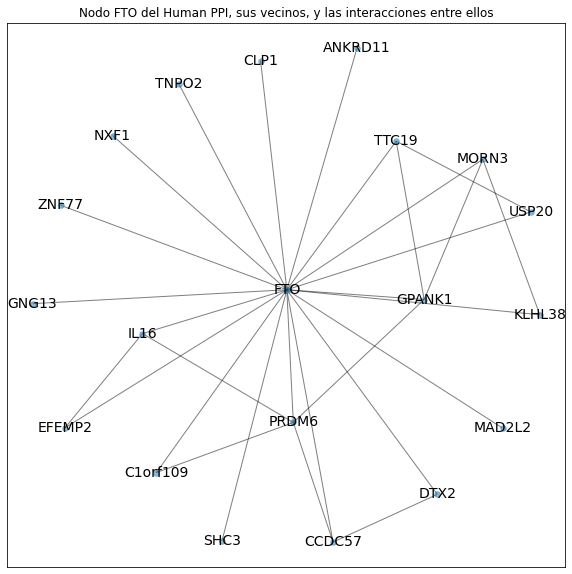

In [19]:
pos = nx.nx_agraph.graphviz_layout(H,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(H, pos=pos,node_size=30,alpha=0.5)
nx.draw_networkx_edges(H, pos=pos,width=1,arrows=False,alpha=0.5)
# #Uncomment to label by node number
nx.draw_networkx_labels(H,pos=pos, font_size=14, alpha=1)
plt.title("Nodo FTO del Human PPI, sus vecinos, y las interacciones entre ellos")
plt.show()

Instead of looking at the neighbors, we can look at the subgraph of the neighbors and their neighbors (i.e., nodes with a distance <=2)

In [82]:
vecinos_FTO=[n for n in PPI.neighbors("FTO")]
vecinos_2_FTO=set(["FTO"]+vecinos_FTO)
for n2 in vecinos_FTO:
  vecinos=[n for n in list(PPI.neighbors(n2))]
  vecinos_2_FTO=vecinos_2_FTO.union(set(vecinos))
H_2 = PPI.subgraph(list(vecinos_2_FTO))
print(H_2.nodes())
print(nx.info(H_2))

['ZBTB16', 'TBC1D22B', 'ZMAT1', 'ZNF558', 'KPRP', 'KRTAP19-5', 'APEX2', 'MID2', 'BRPF1', 'TRIB3', 'KLF15', 'KRT33B', 'KRT38', 'PYCR1', 'MLN', 'PSMB5', 'TSGA10', 'NIF3L1', 'ARRDC3', 'BIRC7', 'FAM221B', 'RAB3IL1', 'USP21', 'ANKRD23', 'KAT5', 'ZBED1', 'CCDC7', 'RINT1', 'CALCOCO2', 'STK16', 'KIAA0408', 'ZMAT5', 'PRR3', 'NUTM1', 'C10orf82', 'TTC23', 'PNMA1', 'USP6', 'FAM161A', 'ROBO3', 'SGTA', 'GADD45GIP1', 'COPS6', 'GPRASP2', 'MXRA8', 'FUCA2', 'DVL3', 'TIFA', 'MDFI', 'SYTL3', 'MKRN3', 'PDE4DIP', 'TEKT1', 'SLC22A18AS', 'KRTAP6-2', 'SFI1', 'MAGED1', 'FGF16', 'LHX3', 'FAM228A', 'RUBCN', 'KRTAP19-1', 'FAM107A', 'PROSER3', 'AES', 'AQP1', 'TRIM29', 'UTP14C', 'UBASH3A', 'PPM1B', 'MEI4', 'CLK2', 'ZNF438', 'SAPCD2', 'MYF5', 'BANP', 'BCL2L11', 'ZNF341', 'BLZF1', 'PIDD1', 'ZNF143', 'PPHLN1', 'PAX6', 'LMO1', 'CCDC94', 'HAUS3', 'LCE1C', 'L3MBTL3', 'KRTAP3-2', 'PIH1D2', 'FBXW5', 'APIP', 'ZNF688', 'MED19', 'KRTAP2-4', 'BCAR3', 'BIRC8', 'RPH3AL', 'BHLHB9', 'HBA1', 'ZSWIM3', 'BLMH', 'CTAG1B', 'WASHC3', 'NA

Note that even this is already a large graph, so it will be difficult to visualize.

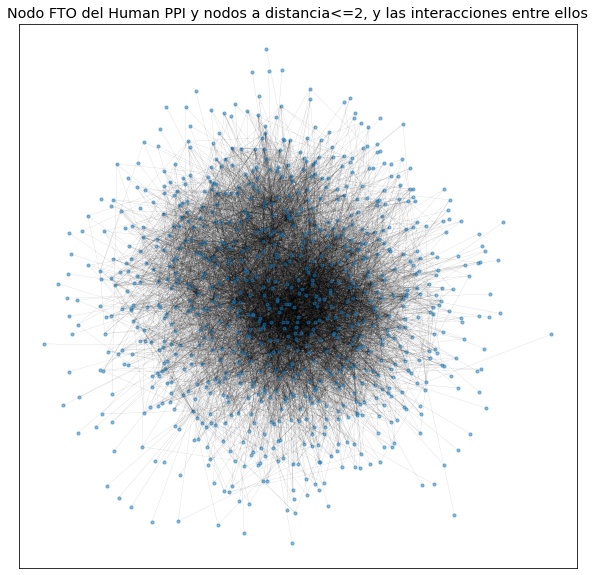

In [81]:
pos = nx.nx_agraph.graphviz_layout(H_2,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(H_2, pos=pos,node_size=10,alpha=0.5)
nx.draw_networkx_edges(H_2, pos=pos,width=0.1,arrows=False,alpha=0.5)
# #Uncomment to label by node number
#nx.draw_networkx_labels(H_2,pos=pos, font_size=14, alpha=1)
plt.title("Nodo FTO del Human PPI y nodos a distancia<=2, y las interacciones entre ellos")
plt.show()

We can try to understand more of the structure by coloring it according to its distanace to FTO

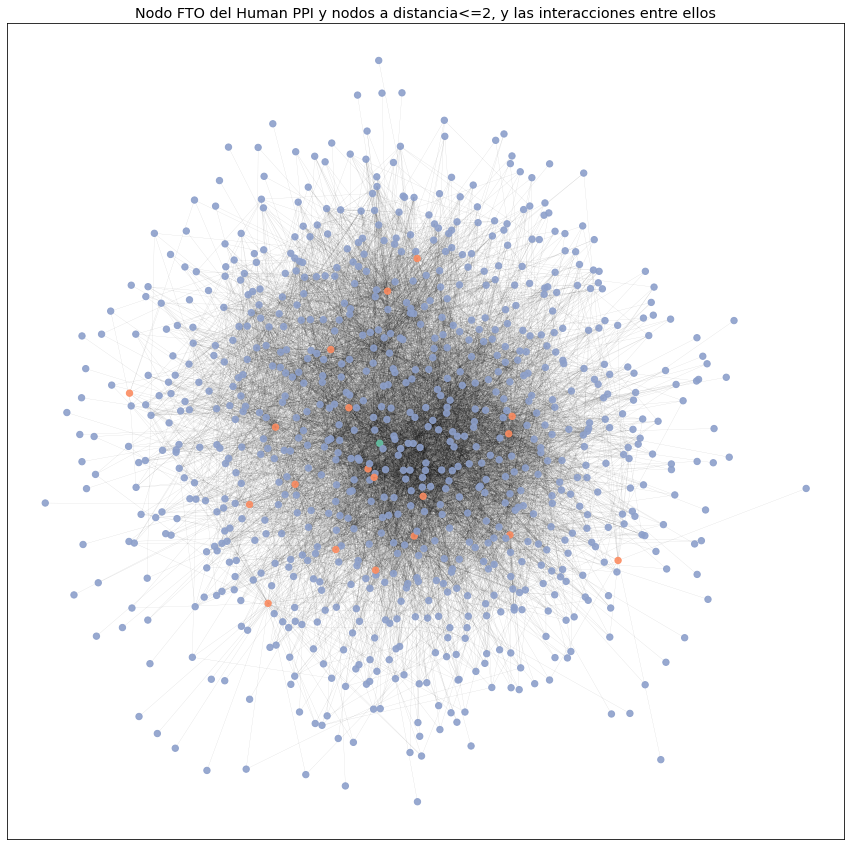

In [179]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(H_2,prog='neato')
node_colors={node:distances_FTO[node] for node in list(H_2.nodes())}

# Plot the graph
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(H_2, pos=pos,node_size=40,alpha=0.9,node_color=list(node_colors.values()),cmap=plt.cm.Set2,vmin=0,vmax=8)
nx.draw_networkx_edges(H_2, pos=pos,width=0.2,alpha=0.2,arrows=False)
# Uncomment to label by node number
# nx.draw_networkx_labels(G_sarscov2,pos=pos, font_size=8, alpha=1)

plt.title("Nodo FTO del Human PPI y nodos a distancia<=2, y las interacciones entre ellos")
plt.show()